In [1]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
from findpeaks import findpeaks

In [2]:
from comsolmllinux.noise import make_noise
from comsolmllinux.custom_fk import make_fk

In [3]:
sensorindex = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
timesamples = 400
noisedb = -12
dt = 1e-6
dx = 3456*0.2e-3/72 # For clock positions

In [15]:
1/dx/2

52.08333333333333

In [4]:
mat = scipy.io.loadmat(Path().joinpath('..', 'data', 'input_synth', 'input_synth_ideal', 'concat_traces_ideal.mat'))

In [5]:
X = mat['concat_traces'].astype('float32')
X = np.swapaxes(X, 2, 1)
X.dtype, X.shape

(dtype('float32'), (21, 73, 401))

In [40]:
#X = X[:,::6,:] #Selecting clock positions. Comment out if all positions

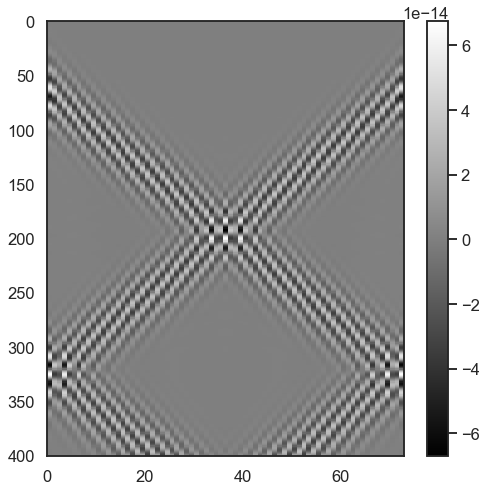

In [6]:
sns.set_style('white')
sns.set_context('talk')
plt.figure(figsize=(8,8))

plt.pcolormesh(X[0,:,:].T, cmap='gray')
plt.gca().invert_yaxis()
plt.colorbar()


plt.show()

In [7]:
time_scaling = np.sqrt(np.arange(1, X.shape[-1]+1, dtype='float32'))
time_scaling = np.expand_dims(time_scaling, -1).T
time_scaling.shape

(1, 401)

In [8]:
X = np.divide(X, time_scaling)

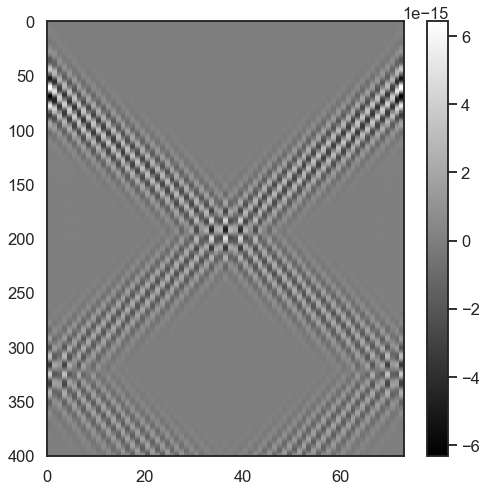

In [9]:
sns.set_style('white')
sns.set_context('talk')
plt.figure(figsize=(8,8))

plt.pcolormesh(X[0,:,:].T, cmap='gray')
plt.gca().invert_yaxis()
plt.colorbar()

plt.show()

In [10]:
labels = pd.read_csv(Path().joinpath('..', 'data', 'input_synth', 'input_synth_ideal', 'labels_ideal.csv'))

In [11]:
labels.rename(columns={'thickness':'Thickness',
                       'depression':'Depression depth',
                       'pitting':'Pitting depth',
                       'depression_mu':'Depression location',
                       'depression_sigma':'Depression width',
                       'thickness_max':'Thickness maximum',
                       'thickness_min':'Thickness minimum',
                       'thickness_mean':'Thickness mean',
                       'thickness_median':'Thickness median',
                       'thickness_std':'Thickness std',
                       'model_rough_coeff':'Roughness',
                       'num_pits':'Number of pits'}, inplace=True)

In [12]:
labels

,modelname,Thickness,seed,Depression depth,Pitting depth,Depression location,Depression width,Thickness maximum,Thickness minimum,Thickness mean,Thickness median,Thickness std,thickness_var,Roughness,Number of pits
0,model_c3456_t030_d000_p000_r1000_s000,6.0,0,0,0,316.922805,67.625959,6.0,6.0,6.0,6.0,0,0,1,0
1,model_c3456_t031_d000_p000_r1000_s000,6.2,0,0,0,316.922805,67.625959,6.2,6.2,6.2,6.2,0,0,1,0
2,model_c3456_t032_d000_p000_r1000_s000,6.4,0,0,0,316.922805,67.625959,6.4,6.4,6.4,6.4,0,0,1,0
3,model_c3456_t033_d000_p000_r1000_s000,6.6,0,0,0,316.922805,67.625959,6.6,6.6,6.6,6.6,0,0,1,0
4,model_c3456_t034_d000_p000_r1000_s000,6.8,0,0,0,316.922805,67.625959,6.8,6.8,6.8,6.8,0,0,1,0
5,model_c3456_t035_d000_p000_r1000_s000,7.0,0,0,0,316.922805,67.625959,7.0,7.0,7.0,7.0,0,0,1,0
6,model_c3456_t036_d000_p000_r1000_s000,7.2,0,0,0,316.922805,67.625959,7.2,7.2,7.2,7.2,0,0,1,0
7,model_c3456_t037_d000_p000_r1000_s000,7.4,0,0,0,316.922805,67.625959,7.4,7.4,7.4,7.4,0,0,1,0
8,model_c3456_t038_d000_p000_r1000_s000,7.6,0,0,0,316.922805,67.625959,7.6,7.6,7.6,7.6,0,0,1,0
9,model_c3456_t039_d000_p000_r1000_s000,7.8,0,0,0,316.922805,67.625959,7.8,7.8,7.8,7.8,0,0,1,0


In [47]:
X_sample_c = X[:,:,:timesamples]/X.max()
X_sample_n = X_sample_c + make_noise(noisedb, X_sample_c.shape)

In [48]:
X_sample_n.shape

(21, 73, 400)

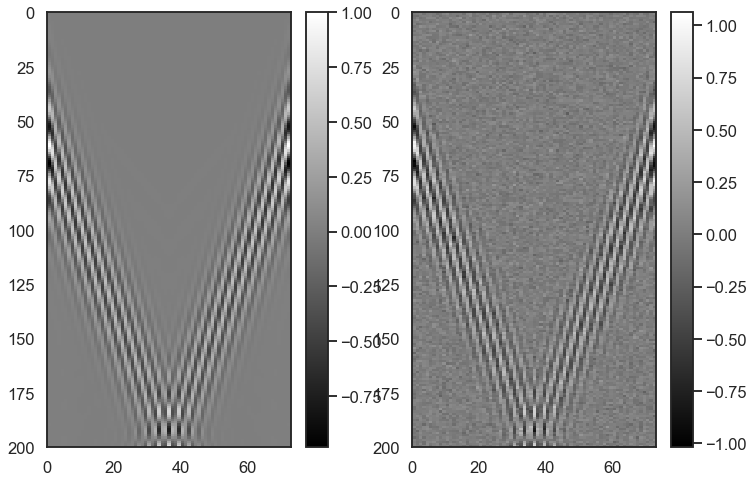

In [49]:
sns.set_style('white')
sns.set_context('talk')
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.pcolormesh(X_sample_c[0,:,:200].T, cmap='gray')
plt.gca().invert_yaxis()
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(X_sample_n[0,:,:200].T, cmap='gray')
plt.gca().invert_yaxis()
plt.colorbar()

plt.show()

In [50]:
def pick_sensors(X_sample, sensorindex):
  # Sparse sensor mode:
  X_sample = np.take(X_sample, sensorindex, axis=1)
  if len(sensorindex)==1:
    X_sample = np.expand_dims(X_sample, 1)
  return X_sample

In [51]:
#X_sample_n = pick_sensors(X_sample_n, sensorindex) #Comment out if all sensors
#X_sample_c = pick_sensors(X_sample_c, sensorindex) #Comment out if all sensors
X_sample_n.shape, X_sample_c.shape

((21, 73, 400), (21, 73, 400))

# Estimation

## FK method

In [131]:
decim = 1
fk, x_array, f_array = make_fk(X_sample_c[0,::decim,:].T, dt, dx)
fk, x_array, f_array = make_fk(X_sample_n[0,::decim,:].T, dt, dx)

In [143]:
fk_abs = 10*np.log(np.abs(fk)/np.max(np.abs(fk)))

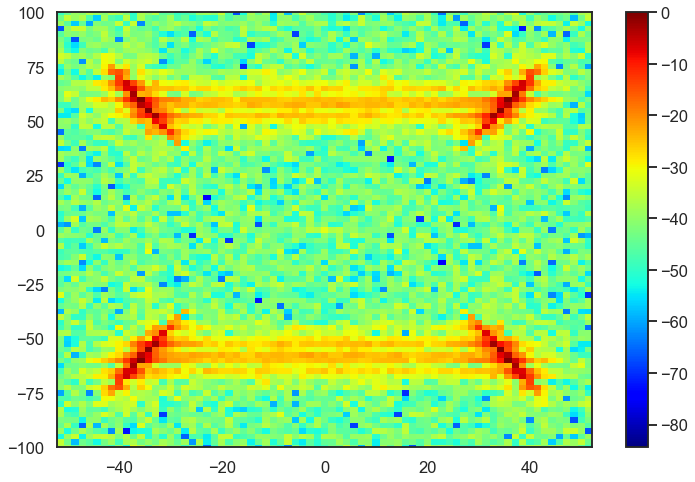

In [144]:
plt.figure(figsize=(12,8))
plt.pcolormesh(x_array, f_array/1000, fk_abs , cmap='jet')
plt.colorbar()
plt.ylim(-100, 100)
plt.show()

In [134]:
fk_abs

array([[ -77.45250561, -102.65221965,  -88.63356316, ...,  -88.63356316,
        -102.65221965,  -77.45250561],
       [ -99.19848042,  -86.52106598,  -87.11536469, ..., -142.28187491,
         -77.72907633,  -82.1698566 ],
       [-100.80338258,  -89.0011738 ,  -83.0867472 , ...,  -92.60449257,
         -80.19450888,  -75.96008187],
       ...,
       [ -77.3690147 ,  -93.30123069,  -73.19218991, ...,  -85.1549263 ,
        -102.28295201,  -77.46175986],
       [ -75.96008187,  -80.19450888,  -92.60449257, ...,  -83.0867472 ,
         -89.0011738 , -100.80338258],
       [ -82.1698566 ,  -77.72907633, -142.28187491, ...,  -87.11536469,
         -86.52106598,  -99.19848042]])

In [135]:
fk_abs.shape

(400, 73)

In [146]:
print(findPeak(fk_abs, 400, 73))

0


In [147]:
scipy.signal.find_peaks(fk_abs[200, :])

(array([ 1,  3,  6,  9, 13, 19, 23, 25, 28, 30, 32, 34, 36, 38, 40, 42, 44,
        47, 49, 53, 59, 63, 66, 69, 71], dtype=int64),
 {})

In [148]:
len(fk)

400

In [150]:
fk_crop = fk[len(fk) //2:, :]
fk_abs_crop = fk_abs[len(fk_abs)//2:, :]

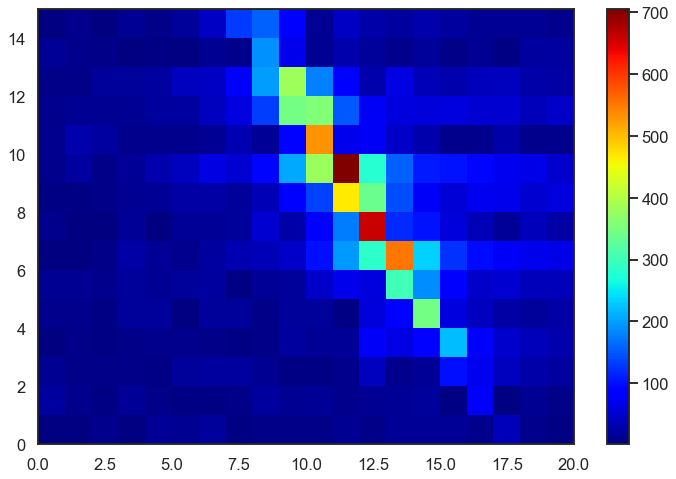

In [217]:
plt.figure(figsize=(12,8))
plt.pcolormesh(np.abs(fk_crop[15:30,0:20]), cmap='jet')
#plt.ylim(0, 50)
plt.colorbar()
plt.show()

In [219]:
np.abs(fk_crop[15:30,0:20]).max()

704.6099921061458

[findpeaks] >Finding peaks in 2d-array using topology method..
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Conversion to gray image.
[findpeaks] >WARNING: Conversion to gray not possible.
[findpeaks] >Denoising with [fastnl], window: [3].
[findpeaks] >Detect peaks using topology method with limit at None.
[findpeaks] >Detect peaks using topology method with limit at None.
[findpeaks] >Fin.


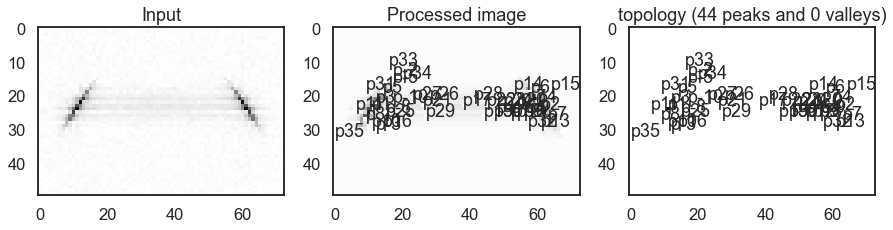

(<AxesSubplot:title={'center':'Input'}>,
 <AxesSubplot:title={'center':'Processed image'}>,
 <AxesSubplot:title={'center':'topology (44 peaks and 0 valleys)'}>)

In [213]:
fp = findpeaks(method='topology')
peaks = fp.fit(np.abs(fk_crop[0:50,:]))
fp.plot()

In [214]:
peaks.keys()

dict_keys(['Xraw', 'Xproc', 'Xdetect', 'Xranked', 'persistence', 'groups0'])

In [221]:
peaks['persistence']

,x,y,birth_level,death_level,score,peak,valley
0,11,24,255.0,0.0,255.0,True,False
1,61,24,254.0,20.0,234.0,True,False
2,12,22,238.0,168.0,70.0,True,False
3,60,22,238.0,169.0,69.0,True,False
4,14,19,125.0,109.0,16.0,True,False
...,...,...,...,...,...,...,...
5,52,25,-7.0,-9.0,-2.0,False,True
6,55,22,-9.0,-11.0,-2.0,False,True
7,15,25,-3.0,-8.0,-5.0,False,True
8,56,25,-4.0,-11.0,-7.0,False,True


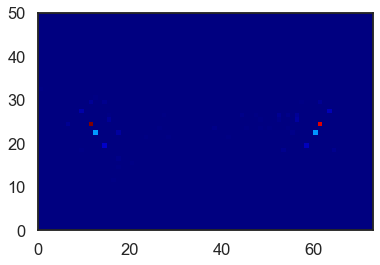

In [215]:
plt.figure()
plt.pcolormesh(peaks['Xdetect'], cmap='jet')
plt.show()

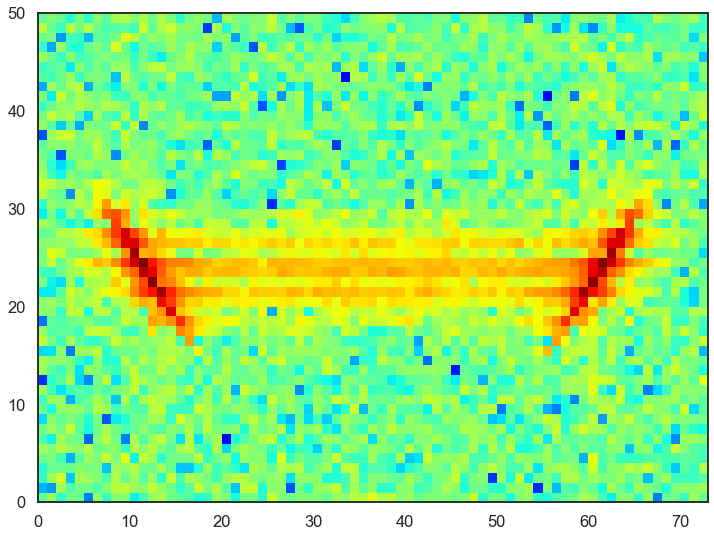

In [227]:
plt.figure(figsize=(12, 9))
plt.pcolormesh(fk_abs_crop, cmap='jet')
plt.ylim(0,50)
plt.show()

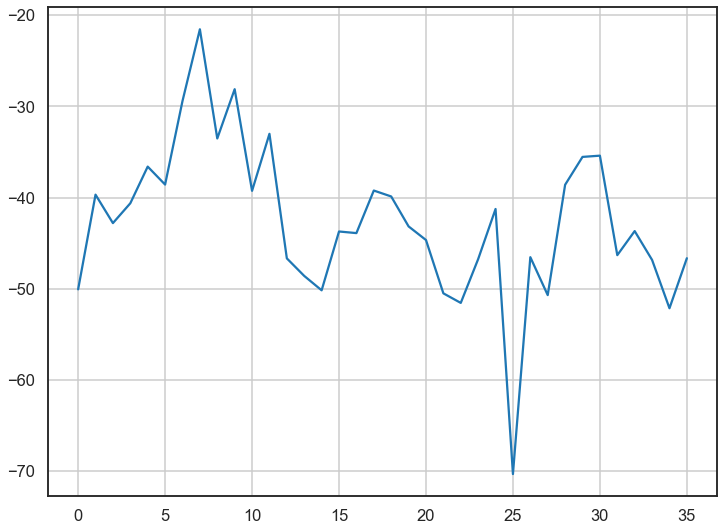

In [277]:
data_slice = fk_abs_crop[30,:36]
peaks, _ = scipy.signal.find_peaks(data_slice, prominence=30)
#peaks, _ = scipy.signal.find_peaks(data_slice, width=1)
plt.figure(figsize=(12, 9))
plt.plot(data_slice)
plt.plot(peaks, data_slice[peaks], "x")
plt.grid()
plt.show()

In [257]:
peaks

array([ 21, 123, 164], dtype=int64)

In [241]:
scipy.signal.find_peaks(data_slice, prominence=15)

(array([ 7, 30, 65, 70], dtype=int64),
 {'prominences': array([28.54156848, 26.13195821, 40.03860346, 23.12059142]),
  'left_bases': array([ 0, 25, 25, 68], dtype=int64),
  'right_bases': array([25, 40, 68, 72], dtype=int64)})

In [260]:
peakpos = np.argmax(data_slice)
peakpos

32

## "pi-skip"?

In [ ]:
sns.set_style('white')
sns.set_context('talk')
plt.figure(figsize=(12,8))

plt.pcolormesh(X_sample_c[0,:25,:200].T, cmap='gray')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

In [ ]:
test_data = X_sample_c[0,:25,:200].T

In [ ]:
plt.figure()
plt.pcolormesh(test_data, cmap='gray')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

In [ ]:
plt.figure()
plt.plot(test_data[:,10])
plt.plot(test_data[:,11])
plt.grid()
plt.xlim(100,120)
plt.show()

In [ ]:
L = 1000
fx = np.fft.fft(test_data, n=L, axis=0)
f_array = np.fft.fftshift(np.fft.fftfreq(L, dt))

In [ ]:
plt.figure()
plt.pcolormesh(np.arange(0,25), f_array/1000, np.fft.fftshift(np.abs(fx), axes=0), cmap='jet')
plt.ylim(0,100)
plt.show()

In [ ]:
fx[:,:-1].shape

In [ ]:
angles = np.zeros(shape=fx[:,:-1].shape)

In [ ]:
angles.shape

In [ ]:
for i in range(0, fx.shape[1]-1):
    angles[:,i] = np.unwrap(np.angle(fx[:,i+1]/fx[:,i]))

In [ ]:
plt.figure()
plt.plot(angles[:,23])
plt.show()

In [ ]:
plt.figure()
plt.pcolormesh(angles, cmap='jet')
plt.colorbar()
plt.show()

In [ ]:
delt = dt*6
delx = dx*1
vf_apri_fc = 1900
ang_apri = 2*np.pi*60e3*(delt-delx/vf_apri_fc)

In [ ]:
ang_apri

In [ ]:
if np.abs(angles-ang_apri) > np.pi:
    angles = angles - np.round((angles-ang_apri)/(2*np.pi))*2*np.pi

In [ ]:
angles_corrected = np.where(np.abs(angles-ang_apri) > np.pi, angles - np.round((angles-ang_apri)/(2*np.pi))*2*np.pi, angles)

In [ ]:
plt.figure()
plt.pcolormesh(angles_corrected, cmap='jet')
plt.colorbar()
plt.show()

In [ ]:
vphi = delx/(delt-angles_corrected[:,7]/w)

In [ ]:
plt.figure()
plt.plot(vphi)
plt.xlim(0, 200)
plt.show()

In [ ]:
fk, x_array, f_array = make_fk(X_sample_c[0,:25,:200].T, dt, dx)

In [ ]:
plt.figure(figsize=(12, 8))
plt.pcolormesh(x_array, f_array/1000, 20*np.log(np.abs(fk)/np.max(np.abs(fk))), cmap='jet')
plt.colorbar()
plt.ylabel('kHz')
plt.ylim(0,100)
#plt.clim(-60, 0)

plt.show()

In [ ]:
fft = np.fft.fft(X_sample_c[0,:25,:200].T, n=1000, axis=0)

In [ ]:
len(fft[0,:])

In [ ]:
angles.shape

In [ ]:
angles = np.zeros(shape=fft.shape)
for n in range(1, len(fft[0,:])):
    angles[:, n] = np.unwrap(np.angle(fft[:, n]/fft[:,n-1]))

In [ ]:
L = 1000
f = fs*np.arange(0,L,1)/L

In [ ]:
angles.shape

In [ ]:
f.shape

In [ ]:
plt.figure()
plt.pcolormesh(angles.T, cmap='jet')
plt.colorbar()
plt.show()

In [ ]:
plt.figure()
plt.plot(abs(fft[:,1]))
plt.show()

In [ ]:
plt.figure()
plt.pcolormesh(abs(fft), cmap='jet')
plt.show()

In [ ]:
plt.figure()
plt.plot(X_sample_c[0,10,:200])
plt.plot(X_sample_c[0,13,:200])
plt.grid('both')
plt.show()

In [ ]:
from scipy.fftpack import fft

In [ ]:
fs = 1/dt
L = 1000
Sw1 = fft(X_sample_c[0,10,:200], n=L)
Sw2 = fft(X_sample_c[0,13,:200], n=L)
f = fs*np.arange(0, L, 1)/L
w = 2*np.pi*f

In [ ]:
plt.figure()
plt.plot(np.abs(Sw1))
plt.plot(np.abs(Sw2))
plt.show()

In [ ]:
fk.shape

In [ ]:
delt = 0
ang = np.unwrap(np.angle(Sw2/Sw1))
vphi = dx/(delt-(ang/w))

In [ ]:
plt.figure()
plt.plot(f/1000, vphi)
plt.ylim(-3000, 3000)
plt.xlim(30, 100)
plt.grid()
plt.show()